In [1]:
# Extract keyords and important topics
# Wordcloud to show the ones that occur the most often
# Visualizations between employee title, tenure, department and the rating they gave

In [2]:
# Heatmap on a map of the world for grades by location

In [3]:
# Extract the top N positives and negative points that come up in reviews

In [4]:
# General sentiment about the company - different segments of the employee population.

# > What are the segments of people we are interested in? Everyone? Mangers and up?
# > What do we want to know about them? How they feel about the company
# > Why do they feel that way? - Topic Extraction and Clustering
# > How has this changed through time? Were people giving better reviews in 2018?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

import string
#from wordcloud import WordCloud

In [6]:
import plotly as py
import cufflinks as cf

In [7]:
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

### Data import

In [8]:
df = pd.read_csv('Data.csv', index_col = 0)
df.head()

,Title,Rating,Designation,Pros,Cons,Author Info
0,Great Culture and Company That Cares,4,Current Employee,Not much politics and very few ego's. Everyone...,Need to focus on career growth and promoting w...,13 Jan 2021 - Senior Corporate Recruiter in Tr...
1,Shaping the Future of Mobility!,5,"Current Employee, more than 1 year","Global Work Environment, Cutting Edge Technolo...",None to mention at this time.,"14 Apr 2021 - Program Manager in Dublin, Dublin"
2,Lots of potential- getting there,4,"Current Employee, more than 1 year",A very fast paced environment - you definitely...,Training and coaching could be better- high ex...,"22 May 2021 - SCM in Dublin, Dublin"
3,Alright but not the best,3,"Current Employee, more than 1 year","Excellent office, good staff, good pay, good b...","Dis organised, office politics at mid/top leve...","8 Mar 2021 - Business Analyst in Dublin, Dublin"
4,Aptiv,3,Current Employee,It is one of the leaders in the automotive ind...,"High pressure for hitting numbers, it is more ...","7 Nov 2020 - Supply Chain in Dublin, Dublin"


In [9]:
df['Date Posted'] = df['Author Info'].str[0.8]
df['Date Posted'] = df['Author Info']
df.head(20)

,Title,Rating,Designation,Pros,Cons,Author Info,Date Posted
0,Great Culture and Company That Cares,4,Current Employee,Not much politics and very few ego's. Everyone...,Need to focus on career growth and promoting w...,13 Jan 2021 - Senior Corporate Recruiter in Tr...,13 Jan 2021 - Senior Corporate Recruiter in Tr...
1,Shaping the Future of Mobility!,5,"Current Employee, more than 1 year","Global Work Environment, Cutting Edge Technolo...",None to mention at this time.,"14 Apr 2021 - Program Manager in Dublin, Dublin","14 Apr 2021 - Program Manager in Dublin, Dublin"
2,Lots of potential- getting there,4,"Current Employee, more than 1 year",A very fast paced environment - you definitely...,Training and coaching could be better- high ex...,"22 May 2021 - SCM in Dublin, Dublin","22 May 2021 - SCM in Dublin, Dublin"
3,Alright but not the best,3,"Current Employee, more than 1 year","Excellent office, good staff, good pay, good b...","Dis organised, office politics at mid/top leve...","8 Mar 2021 - Business Analyst in Dublin, Dublin","8 Mar 2021 - Business Analyst in Dublin, Dublin"
4,Aptiv,3,Current Employee,It is one of the leaders in the automotive ind...,"High pressure for hitting numbers, it is more ...","7 Nov 2020 - Supply Chain in Dublin, Dublin","7 Nov 2020 - Supply Chain in Dublin, Dublin"
5,Black stain on the IDA - Kevin and Joe Show - ...,1,"Current Employee, less than 1 year",The marketing department is great at creating ...,Everything about this place is a con. Dont wor...,"11 May 2020 - Financial Analyst in Dublin, Dublin","11 May 2020 - Financial Analyst in Dublin, Dublin"
6,"Bad culture, no HR alignment",1,"Current Employee, more than 3 years","Fairly okay salary, key stakeholders good to w...","HR is all over the place, no centralised HR, g...",13 Jan 2021 - Human Resources Business Partner...,13 Jan 2021 - Human Resources Business Partner...
7,Good working place,4,Former Employee,good package comparing to other companies,IT chaos in terms of org and process,"7 Nov 2020 - Solutions Architect in Dublin, Du...","7 Nov 2020 - Solutions Architect in Dublin, Du..."
8,Very good company advancing the technology for...,5,Current Employee,#NAME?,#NAME?,"10 Aug 2020 - EMEA Internal Audit, Sox & Compl...","10 Aug 2020 - EMEA Internal Audit, Sox & Compl..."
9,Soulless company that grinds you into dust,1,"Current Employee, more than 1 year","Beautiful offices, friendly work colleagues, f...",This is the hardest company I've ever worked f...,"28 Aug 2020 - Corporate Ops in Dublin, Dublin","28 Aug 2020 - Corporate Ops in Dublin, Dublin"


In [10]:
# DROP UNWANTED COLUMNS
# df.drop(labels=['column name', 'column name'], axis=1, inplace=True)
# df.head()

In [11]:
df.isnull().sum()

Title          0
Rating         0
Designation    0
Pros           0
Cons           0
Author Info    0
Date Posted    0
dtype: int64

Rectangle(xy=(-0.4, 0), width=0.8, height=209, angle=0)
209
Rectangle(xy=(0.6, 0), width=0.8, height=145, angle=0)
145
Rectangle(xy=(1.6, 0), width=0.8, height=118, angle=0)
118
Rectangle(xy=(2.6, 0), width=0.8, height=58, angle=0)
58
Rectangle(xy=(3.6, 0), width=0.8, height=49, angle=0)
49


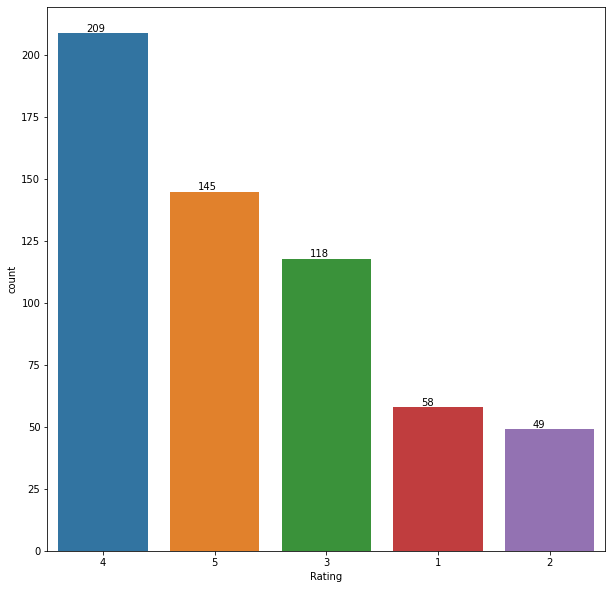

In [12]:
# How many reviews have each star
plt.figure(figsize=(10,10))

ax = sns.countplot(x=df['Rating'], data=df, order=df['Rating'].value_counts().index)
for p, label in zip(ax.patches, df['Rating'].value_counts()):
    print(p)
    print(label)
    ax.annotate(label, (p.get_x()+0.25, p.get_height()+0.5))

### Feature Engineering

In [13]:
from textblob import TextBlob

In [14]:
# What is the sentiment polarity for a particular text
df['Pros_polarity'] = df['Pros'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [15]:
# Review length - How many characters are there
df['Pros_len'] = df['Pros'].apply(lambda x: len(x))

In [16]:
# Total number of words in the review
df['Pros_Word_count'] = df['Pros'].apply(lambda x: len(x.split()))

In [17]:
# Calculate the aarege word length
def get_avg_word_length(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
    return word_len/len(words)

In [18]:
df['Pros_avg_words_len'] = df['Pros'].apply(lambda x: get_avg_word_length(x))

In [19]:
df.head()

,Title,Rating,Designation,Pros,Cons,Author Info,Date Posted,Pros_polarity,Pros_len,Pros_Word_count,Pros_avg_words_len
0,Great Culture and Company That Cares,4,Current Employee,Not much politics and very few ego's. Everyone...,Need to focus on career growth and promoting w...,13 Jan 2021 - Senior Corporate Recruiter in Tr...,13 Jan 2021 - Senior Corporate Recruiter in Tr...,0.173262,173,32,4.437500
1,Shaping the Future of Mobility!,5,"Current Employee, more than 1 year","Global Work Environment, Cutting Edge Technolo...",None to mention at this time.,"14 Apr 2021 - Program Manager in Dublin, Dublin","14 Apr 2021 - Program Manager in Dublin, Dublin",-0.033333,79,9,7.888889
2,Lots of potential- getting there,4,"Current Employee, more than 1 year",A very fast paced environment - you definitely...,Training and coaching could be better- high ex...,"22 May 2021 - SCM in Dublin, Dublin","22 May 2021 - SCM in Dublin, Dublin",0.162056,379,66,4.757576
3,Alright but not the best,3,"Current Employee, more than 1 year","Excellent office, good staff, good pay, good b...","Dis organised, office politics at mid/top leve...","8 Mar 2021 - Business Analyst in Dublin, Dublin","8 Mar 2021 - Business Analyst in Dublin, Dublin",0.775000,53,8,5.750000
4,Aptiv,3,Current Employee,It is one of the leaders in the automotive ind...,"High pressure for hitting numbers, it is more ...","7 Nov 2020 - Supply Chain in Dublin, Dublin","7 Nov 2020 - Supply Chain in Dublin, Dublin",0.000000,85,15,4.733333


In [20]:
# What is the sentiment polarity for a particular text
df['Cons_polarity'] = df['Cons'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Review length - How many characters are there
df['Cons_len'] = df['Cons'].apply(lambda x: len(x))

# Total number of words in the review
df['Cons_Word_count'] = df['Cons'].apply(lambda x: len(x.split()))

In [21]:
# Calculate the aarege word length
def get_avg_word_length(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
    return word_len/len(words)

In [22]:
df['Cons_avg_words_len'] = df['Pros'].apply(lambda x: get_avg_word_length(x))

In [23]:
df.head()

,Title,Rating,Designation,Pros,Cons,Author Info,Date Posted,Pros_polarity,Pros_len,Pros_Word_count,Pros_avg_words_len,Cons_polarity,Cons_len,Cons_Word_count,Cons_avg_words_len
0,Great Culture and Company That Cares,4,Current Employee,Not much politics and very few ego's. Everyone...,Need to focus on career growth and promoting w...,13 Jan 2021 - Senior Corporate Recruiter in Tr...,13 Jan 2021 - Senior Corporate Recruiter in Tr...,0.173262,173,32,4.437500,-0.050000,131,20,4.437500
1,Shaping the Future of Mobility!,5,"Current Employee, more than 1 year","Global Work Environment, Cutting Edge Technolo...",None to mention at this time.,"14 Apr 2021 - Program Manager in Dublin, Dublin","14 Apr 2021 - Program Manager in Dublin, Dublin",-0.033333,79,9,7.888889,0.000000,29,6,7.888889
2,Lots of potential- getting there,4,"Current Employee, more than 1 year",A very fast paced environment - you definitely...,Training and coaching could be better- high ex...,"22 May 2021 - SCM in Dublin, Dublin","22 May 2021 - SCM in Dublin, Dublin",0.162056,379,66,4.757576,0.386667,118,18,4.757576
3,Alright but not the best,3,"Current Employee, more than 1 year","Excellent office, good staff, good pay, good b...","Dis organised, office politics at mid/top leve...","8 Mar 2021 - Business Analyst in Dublin, Dublin","8 Mar 2021 - Business Analyst in Dublin, Dublin",0.775000,53,8,5.750000,-0.400000,81,12,5.750000
4,Aptiv,3,Current Employee,It is one of the leaders in the automotive ind...,"High pressure for hitting numbers, it is more ...","7 Nov 2020 - Supply Chain in Dublin, Dublin","7 Nov 2020 - Supply Chain in Dublin, Dublin",0.000000,85,15,4.733333,0.100278,208,37,4.733333


### Distribution of Sentiment Polarity

In [24]:
df['Pros_polarity'].iplot(kind = 'hist', colors = 'red', bins = 50, xTitle = 'Polarity')
df['Cons_polarity'].iplot(kind = 'hist', colors = 'red', bins = 50, xTitle = 'Polarity')

### Distribution of Reviews, Ratings, and Reviewers Age

In [25]:
df['Rating'].iplot(kind = 'hist', xTitle = 'Rating', yTitle = 'Count', title = 'Review Rating Distribution')

In [26]:
df[['Rating', 'Author Info']].iplot(kind='hist', color='red')

### Candidate Keywords/Keyphrases

In [48]:
doc = "Need to focus on career growth and promoting within. Not much movement with internal candidates which turns into employees leaving."

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

n_gram_range = (1, 1)
stop_words = "english"

# Extract candidate words/phrases
count = CountVectorizer(ngram_range=n_gram_range, stop_words=stop_words).fit([doc])
candidates = count.get_feature_names()

In [50]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('distilbert-base-nli-mean-tokens')
doc_embedding = model.encode([doc])
candidate_embeddings = model.encode(candidates)

In [51]:
from sklearn.metrics.pairwise import cosine_similarity

top_n = 15
distances = cosine_similarity(doc_embedding, candidate_embeddings)
keywords = [candidates[index] for index in distances.argsort()[0][-top_n:]]

In [52]:
keywords

['turns',
 'focus',
 'internal',
 'movement',
 'need',
 'growth',
 'promoting',
 'leaving',
 'candidates',
 'career',
 'employees']

In [ ]:
mask = (df['Rating'] == 1) | (df['Rating'] == 2)
df_rating_12 = df[mask]
mask = (df['Rating'] == 4) | (df['Rating'] == 5) | (df['Rating'] == 3)
df_rating_345 = df[mask]

In [ ]:
print(len(df_rating_12))
print(len(df_rating_345))

In [2]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [3]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text.lower())
    sentence - [w for w in words if not w in stop_words]
    return " ".join(sentence)

def lemmatize_text(text):
    wordlist=[]
    lemmatizer = WordNetLemmatizer()
    sentences = sent_tokenize(text)
    for sentence in sentences:
        words = word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    return  ' '.join(wordlist)

# Remove punctuations
def clean_text(text):
    delete_dict = {special_char: '' for special_char in string.punctuation}
    delete_dict[''] = ' '
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr = text1.split()
    text2 = ''.join([w for w in textArr])
    return text2.lower()

    